<a href="https://colab.research.google.com/github/evarahma61/Sentiment-Analysis-Twitter/blob/main/NAIVE_BAYES_(Menggunakan_labelling_Sentistrength_id).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import json
import string
import re
import nltk
import pickle
import numpy as np

In [ ]:
from google.colab import files
data_files1 = files.upload()

Saving dataset_final.csv to dataset_final.csv


In [ ]:
dataset = pd.read_csv('dataset_final.csv', encoding = "ISO-8859-1")

In [ ]:
dataset_label = dataset

In [ ]:
dataset_label.head()

,content
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m..."


In [ ]:
dataset_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  3105 non-null   object
dtypes: object(1)
memory usage: 24.4+ KB


## Cleaning

In [ ]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
  text = re.sub(r"http\S+", "", text) # menghilangkan URL gambar
  text = re.sub('@[^\s]+','',text) # menghilangkan mention username dalam tweets
  text = re.sub("@[A-Za-z0-9]+","",text) #menghilangkan mention username dalam tweets
  text = re.sub('[^A-Za-z]+', ' ', text) #menghilangkan simbol dan karakter spesial yang bukan
  return text
# Cleaning the text in the review column
dataset_label['cleaning'] = dataset_label['content'].apply(clean) #membuat kolom baru yang bernama 


In [ ]:
dataset_label

,content,cleaning
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...
...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...


## Case Folding

In [ ]:
def case_folding(text): # Removes all special characters and numericals leaving the alphabets
  text = text.lower() #lowercase) #mengubah ke lowercase semua
  return text
# Cleaning the text in the review column
dataset_label['case_folding'] = dataset_label['cleaning'].apply(case_folding) 
#membuat kolom baru yang bernama case_folding

##Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def tokenization(text):
  text = word_tokenize(text)
  return text
dataset_label['tokenization'] = dataset_label['case_folding'].apply(tokenization) 


##Normalization

In [ ]:
from google.colab import files
kamus = files.upload()

In [ ]:
import pandas as pd
slang = pd.read_excel('kamus.xlsx')

In [ ]:
normalisasi = {}

for index, row in slang.iterrows():
  if row[0] not in normalisasi:
    normalisasi[row[0]] = row[1]


def normalized_term(document):
    return [normalisasi[term] if term in normalisasi else term for term in document]

dataset_label['normalization'] = dataset_label['tokenization'].apply(normalized_term)

##Stopword Removal

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

In [ ]:
print(set(list_stopwords))

{'tidak', 'dituturkan', 'mengucapkannya', 'dong', 'terjadilah', 'terutama', 'kepadanya', 'sejumlah', 'mengetahui', 'amatlah', 'memperkirakan', 'hari', 'lagian', 'membuat', 'apakah', 'sebenarnya', 'diakhiri', 'tersampaikan', 'semisal', 'menyatakan', 'betul', 'panjang', 'berdatangan', 'semata', 'harus', 'artinya', 'bertutur', 'dipertanyakan', 'tengah', 'bukankah', 'menunjuknya', 'maupun', 'sekitar', 'jangankan', 'mengenai', 'menghendaki', 'ucapnya', 'dalam', 'sekitarnya', 'begini', 'sejak', 'guna', 'didapat', 'sini', 'dibuatnya', 'diakhirinya', 'dikatakannya', 'disinilah', 'seringnya', 'keseluruhan', 'menjelaskan', 'meminta', 'bakalan', 'perlukah', 'ditunjukkannya', 'bahwasanya', 'meyakinkan', 'dialah', 'mula', 'seseorang', 'terhadapnya', 'berbagai', 'tambah', 'terakhir', 'begitulah', 'cukuplah', 'bertanya-tanya', 'masih', 'turut', 'masing-masing', 'terlihat', 'ingat-ingat', 'berkali-kali', 'janganlah', 'terdiri', 'itukah', 'melakukan', 'amat', 'mengingatkan', 'percuma', 'hendaknya', 'be

In [ ]:
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

In [ ]:
from google.colab import files
daftar_stopword = files.upload()

Saving daftar_stopwords.txt to daftar_stopwords.txt


In [ ]:
# read txt stopword using pandas
txt_stopword = pd.read_csv("daftar_stopwords.txt", names= ["stopwords"], header = None)

In [ ]:
# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

In [ ]:
# convert list to dictionary
list_stopwords = set(list_stopwords)

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataset_label['stopword_removed'] = dataset_label['normalization'].apply(stopwords_removal) 

In [ ]:
dataset_label

,content,label,cleaning,case_folding,tokenization,normalization,stopword_removed
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",0,Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",0,Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",1,nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen..."
3,"""Semua tahapan proses produksinya, vaksin vekt...",2,Semua tahapan proses produksinya vaksin vekto...,semua tahapan proses produksinya vaksin vekto...,"[semua, tahapan, proses, produksinya, vaksin, ...","[semua, tahapan, proses, produksinya, vaksin, ...","[tahapan, proses, produksinya, vaksin, vektor,..."
4,"""The REPLICATION-DEFECTIVE viral vector (adeno...",2,The REPLICATION DEFECTIVE viral vector adenov...,the replication defective viral vector adenov...,"[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a..."
...,...,...,...,...,...,...,...
3074,LPPOM MUI Sebut Vaksin Astrazeneca Terdapat Ka...,1,LPPOM MUI Sebut Vaksin Astrazeneca Terdapat Ka...,lppom mui sebut vaksin astrazeneca terdapat ka...,"[lppom, mui, sebut, vaksin, astrazeneca, terda...","[lppom, majelis ulama indonesia, sebut, vaksin...","[lppom, majelis ulama indonesia, vaksin, astra..."
3075,Hari ke17 pelaksanaan vaksin merdeka di rumah ...,0,Hari ke pelaksanaan vaksin merdeka di rumah bp...,hari ke pelaksanaan vaksin merdeka di rumah bp...,"[hari, ke, pelaksanaan, vaksin, merdeka, di, r...","[hari, ke, pelaksanaan, vaksin, merdeka, di, r...","[pelaksanaan, vaksin, merdeka, rumah, suryadi,..."
3076,"Ada Kasus Kasus Pembekuan Darah, Lima Negara S...",1,Ada Kasus Kasus Pembekuan Darah Lima Negara Se...,ada kasus kasus pembekuan darah lima negara se...,"[ada, kasus, kasus, pembekuan, darah, lima, ne...","[ada, kasus, kasus, pembekuan, darah, lima, ne...","[pembekuan, darah, negara, setop, penggunaan, ..."
3077,"Abis vaksin badan kerasa pegel2 capek, emang g...",1,Abis vaksin badan kerasa pegel capek emang gin...,abis vaksin badan kerasa pegel capek emang gin...,"[abis, vaksin, badan, kerasa, pegel, capek, em...","[habis, vaksin, badan, kerasa, pegal, capai, m...","[habis, vaksin, badan, kerasa, pegal, capai, e..."


##Stemmer

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [ ]:
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}


In [ ]:
for document in dataset_label['stopword_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

In [ ]:
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


Output streaming akan dipotong hingga 5000 baris terakhir.
membahayakan : bahaya
rasakan : rasa
efikasinya : efikasinya
terbukti : bukti
kabarnya : kabar
habis : habis
berbahagialah : bahagia
pribadi : pribadi
campur : campur
minggu : minggu
utas : utas
lengkap : lengkap
bermanfaat : manfaat
setuju : tuju
massal : massal
penciptanya : cipta
sarah : sarah
gilbert : gilbert
tim : tim
kebebasan : bebas
penuh : penuh
mencatut : catut
hak : hak
paten : paten
jaminan : jamin
termurah : murah
permasalahan : masalah
konvensional : konvensional
tidak apa apa : tidak apa apa
tervaksinasi : vaksinasi
bayar : bayar
arab : arab
saudi : saudi
yordania : yordania
mesir : mesir
perbedaannya : beda
kali : kali
bantu : bantu
mengkhawatirkan : khawatir
data : data
united kingdom : united kingdom
penduduknya : duduk
mayoritas : mayoritas
tergantung : gantung
kandungan : kandung
diterima : terima
anggota : anggota
keluarga : keluarga
daya : daya
tahan : tahan
manusia : manusia
kerja : kerja
bangga : bangga

In [ ]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataset_label['stemming'] = dataset_label['stopword_removed'].apply(get_stemmed_term)


In [ ]:
dataset_label

,content,label,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",0,Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",0,Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",1,nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca..."
3,"""Semua tahapan proses produksinya, vaksin vekt...",2,Semua tahapan proses produksinya vaksin vekto...,semua tahapan proses produksinya vaksin vekto...,"[semua, tahapan, proses, produksinya, vaksin, ...","[semua, tahapan, proses, produksinya, vaksin, ...","[tahapan, proses, produksinya, vaksin, vektor,...","[tahap, proses, produksi, vaksin, vektor, viru..."
4,"""The REPLICATION-DEFECTIVE viral vector (adeno...",2,The REPLICATION DEFECTIVE viral vector adenov...,the replication defective viral vector adenov...,"[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a..."
...,...,...,...,...,...,...,...,...
3074,LPPOM MUI Sebut Vaksin Astrazeneca Terdapat Ka...,1,LPPOM MUI Sebut Vaksin Astrazeneca Terdapat Ka...,lppom mui sebut vaksin astrazeneca terdapat ka...,"[lppom, mui, sebut, vaksin, astrazeneca, terda...","[lppom, majelis ulama indonesia, sebut, vaksin...","[lppom, majelis ulama indonesia, vaksin, astra...","[lppom, majelis ulama indonesia, vaksin, astra..."
3075,Hari ke17 pelaksanaan vaksin merdeka di rumah ...,0,Hari ke pelaksanaan vaksin merdeka di rumah bp...,hari ke pelaksanaan vaksin merdeka di rumah bp...,"[hari, ke, pelaksanaan, vaksin, merdeka, di, r...","[hari, ke, pelaksanaan, vaksin, merdeka, di, r...","[pelaksanaan, vaksin, merdeka, rumah, suryadi,...","[laksana, vaksin, merdeka, rumah, suryadi, war..."
3076,"Ada Kasus Kasus Pembekuan Darah, Lima Negara S...",1,Ada Kasus Kasus Pembekuan Darah Lima Negara Se...,ada kasus kasus pembekuan darah lima negara se...,"[ada, kasus, kasus, pembekuan, darah, lima, ne...","[ada, kasus, kasus, pembekuan, darah, lima, ne...","[pembekuan, darah, negara, setop, penggunaan, ...","[beku, darah, negara, setop, guna, vaksin, ast..."
3077,"Abis vaksin badan kerasa pegel2 capek, emang g...",1,Abis vaksin badan kerasa pegel capek emang gin...,abis vaksin badan kerasa pegel capek emang gin...,"[abis, vaksin, badan, kerasa, pegel, capek, em...","[habis, vaksin, badan, kerasa, pegal, capai, m...","[habis, vaksin, badan, kerasa, pegal, capai, e...","[habis, vaksin, badan, rasa, pegal, capai, efe..."


##Digabungin

In [ ]:
dataset_label["final"] = [' '.join(map(str, l)) for l in dataset_label['stopword_removed']]

##Pelabelan Sentistrength_Id

In [ ]:
import re
from collections import OrderedDict
import numpy as np

class sentistrength:
    def __init__(self, config=dict()):
        self.negasi = [line.replace('\n','') for line in open("negatingword.txt").read().splitlines()]
        self.tanya = [line.replace('\n','') for line in open("questionword.txt").read().splitlines()]
        #create sentiment words dictionary
        self.sentiwords_txt = [line.replace('\n','').split(":") for line in open("sentiwords_id.txt").read().splitlines()]
        self.sentiwords_dict = OrderedDict()
        for term in self.sentiwords_txt:
            self.sentiwords_dict[term[0]] = int(term[1])
        #create emoticon dictionary
        self.emoticon_txt = [line.replace('\n','').split(" | ") for line in open("emoticon_id.txt").read().splitlines()]
        self.emoticon_dict = OrderedDict()
        for term in self.emoticon_txt:
            self.emoticon_dict[term[0]] = int(term[1])
        #create idioms dictionary
        self.idioms_txt = [line.replace('\n','').split(":") for line in open("idioms_id.txt").read().splitlines()]
        self.idioms_dict = OrderedDict()
        for term in self.idioms_txt:
            self.idioms_dict[term[0]] = int(term[1])
        #create boosterwords dictionary
        self.boosterwords_txt = [line.replace('\n','').split(":") for line in open("boosterwords_id.txt").read().splitlines()]
        self.boosterwords_dict = OrderedDict()
        for term in self.boosterwords_txt:
            self.boosterwords_dict[term[0]] = int(term[1])
        self.negation_conf = config["negation"]
        self.booster_conf = config["booster"]
        self.ungkapan_conf = config["ungkapan"]
        self.consecutive_conf = config["consecutive"]
        self.repeated_conf = config["repeated"]
        self.emoticon_conf = config["emoticon"]
        self.question_conf = config["question"]
        self.exclamation_conf = config["exclamation"]
        self.punctuation_conf = config["punctuation"]
        self.mean_conf = False

    def senti(self,term):
        try:
            return self.sentiwords_dict[term]
        except:
            return 0

    def emosikon(self,term):
        try:
            return self.emoticon_dict[term]
        except:
            return 0

    def ungkapan(self,term):
        try:
            return self.idioms_dict[term]
        except:
            return 0

    def booster(self, term):
        try:
            return self.boosterwords_dict[term]
        except:
            return 0

    def cek_negationword(self, prev_term, prev_term2):
        #jika kata sebelumnya (index-1) adalah kata negasi, negasikan nilai -+nya
        if prev_term in self.negasi or prev_term2+" "+prev_term in self.negasi:
            # print prev_term
            self.score = -abs(self.score) if self.score>0 else abs(self.score)

    def cek_boosterword(self,term):
        booster_score = self.booster(term)
        if booster_score !=0 and self.score>0: self.score += booster_score
        if booster_score !=0 and self.score<0: self.score -= booster_score

    def cek_consecutive_term(self, prev_term):
        if self.prev_score>0 and self.score >=3: self.score+=1 
        if self.prev_score<0 and self.score <=-3: self.score-=1 

    def cek_ungkapan(self, bigram,trigram, i):
        bigram = ' '.join(bigram)
        trigram = ' '.join(trigram)
        ungkapan_score = self.ungkapan(bigram)
        if ungkapan_score==0:
            ungkapan_score = self.ungkapan(trigram)
        if ungkapan_score!=0:
            self.score = ungkapan_score
            self.prev_score = 0
            self.pre_max_pos[i-1] = 1
            self.pre_max_neg[i-1] = -1
            self.max_pos = self.pre_max_pos[i-2] #if len(self.pre_max_pos)>1 else 1
            self.max_neg = self.pre_max_neg[i-2] #if len(self.pre_max_neg)>1 else -1
            self.sentence_score[i-1] = re.sub(r'\[\d\]','',self.sentence_score[i-1])

    def cek_repeated_punctuation(self, next_term):
        if re.search(r'!{2,}',next_term) and self.score >=3: self.score+=1
        if re.search(r'!{2,}',next_term) and self.score <=-3: self.score-=1

    def remove_extra_repeated_char(self, term):
        return re.sub(r'([A-Za-z])\1{2,}',r'\1',term)
    def plural_to_singular(self, term):
        return re.sub(r'([A-Za-z]+)\-\1', r'\1',term)
    def classify(self):
        result = "neutral"
        try:
            if self.mean_conf:
                mean_p = np.mean(self.mean_pos)
                mean_n = np.mean(self.mean_neg)
                print (mean_p, mean_n)
                if mean_p > mean_n:
                    result = "positive"
                elif mean_p < mean_n and not self.is_tanya:
                    result = "negative"
                elif mean_p < mean_n and self.is_tanya:
                    result = "neutral"
            else:
                if abs(self.sentences_max_pos) > abs(self.sentences_max_neg):
                    result = "positive"
                elif abs(self.sentences_max_pos) < abs(self.sentences_max_neg):
                    result = "negative"
                elif abs(self.sentences_max_pos) == abs(self.sentences_max_neg):
                    result = "neutral"
        except:
            print ("error ",self.sentences_max_pos, self.sentences_max_neg)
        return result
    def cek_neutral_term(self,terms,i):
        if terms[i-1] in self.neutral_term or terms[i+1] in self.neutral_term: self.score=1 

    def main(self,sentence):
        self.neutral_term = ['jika','kalau']
        sentences = sentence.split('.')
        self.sentences_max_neg = -1
        self.sentences_max_pos = 1
        self.sentences_score = []
        self.sentences_text = []
        for sentence in sentences:
            self.max_neg = -1
            self.max_pos = 1
            self.mean_neg = [1]
            self.mean_pos = [1]
            self.sentence_score=[]
            terms = sentence.split()
            # terms = re.split(r'[\s,.]',sentence)
            terms_length = len(terms)
            self.is_tanya = False
            self.sentence_text = ''
            # print self.max_pos, self.max_neg
            #SEMUA KALIMAT YANG MEMILIKI TANDA SERU MEMILIKI +ve minimal 2
            if self.exclamation_conf and re.search('!',sentence): self.max_pos = 2
            self.prev_score = 0
            self.pre_max_pos = []
            self.pre_max_neg = []
            for i,term in enumerate(terms):
                # repeated_term = ''
                is_extra_char = False
                plural = ''
                self.score = 0
                # if re.search(r'[A-Za-z\-.]+',term):
                # print term
                if re.search(r'([A-Za-z])\1{3,}',term):
                    is_extra_char = True
                    # repeated_term =term
                term = self.remove_extra_repeated_char(term)
                if re.search(r'([A-Za-z]+)\-\1',term):
                    plural = term
                    term = self.plural_to_singular(term)
                #GET SENTI SCORE#
                self.score = self.senti(term)
                # print "senti score",term, self.score

                #NEGATION HANDLER#
                if self.negation_conf and self.score !=0 and i>0:self.cek_negationword(terms[i-1],terms[i-2])
                # print  "negation score",term, self.score

                #BOOSTERWORD HANDLER#
                if self.booster_conf and self.score !=0 and i>0 and i<=(terms_length-1):self.cek_boosterword(terms[i-1])
                if self.booster_conf and self.score !=0 and i>=0 and i<(terms_length-1):self.cek_boosterword(terms[i+1])
                # print  "booster score",term, self.score

                #IDIOM/UNGKAPAN HANDLER#
                if self.ungkapan_conf and i>0 and i<=(terms_length-1):self.cek_ungkapan([terms[i-1],term],[terms[i-2],terms[i-1],term],i)
                # if self.ungkapan_conf and i>=0 and i<(terms_length-1):self.cek_ungkapan([term,terms[i+1]])
                # print  "idiom score",term, self.score

                #CONSECUTIVE SENTIMENT WORD#
                if self.consecutive_conf and i>0 and i<=(terms_length-1) and self.score !=0:self.cek_consecutive_term(terms[i-1])
                # print  "consecutive score",term, self.score

                #+1 SENTI SCORE IF REPEATED CHAR ON POSITIVE/NEGATIVE +2 IF NEUTRAL TERM
                if self.repeated_conf and is_extra_char==True and self.score>0: self.score+=1
                if self.repeated_conf and is_extra_char==True and self.score<0: self.score-=1
                if self.repeated_conf and is_extra_char==True and self.score==0: self.score=2
                # print  "repeat char score", term, self.score
                if self.punctuation_conf and i>=0 and i<(terms_length-1): self.cek_repeated_punctuation(terms[i+1])
                # CEK APAKAH TERDAPAT KATA TANYA
                if self.question_conf and (term in self.tanya or re.search(r'\?',term)):self.is_tanya = True
                # CEK neutral term 
                if self.score!=0 and i>1 and i<(terms_length-2): self.cek_neutral_term(terms,i)
                # if self.score!=0 and i>0 and i<(terms_length-4): self.cek_neutral_term(terms,i)
                if self.emoticon_conf and self.score==0: self.score = self.emosikon(term)

                self.prev_score = self.score
                if self.mean_conf and self.score>0: self.mean_pos.append(self.score)	
                if self.mean_conf and self.score<0: self.mean_neg.append(abs(self.score))
                #GET MAX SCORE +ve/-ve	
                self.max_pos= self.score if self.score > self.max_pos else self.max_pos
                self.max_neg= self.score if self.score < self.max_neg else self.max_neg
                #insert score info current term
                self.pre_max_pos.append(self.max_pos)
                self.pre_max_neg.append(self.max_neg)
                # print self.pre_max_pos, self.pre_max_neg
                if plural !='': term = plural
                self.sentence_text += ' {}'.format(term)
                if self.score != 0:term = "{} [{}]".format(term, self.score)
                self.sentence_score.append(term)

            self.sentences_text.append(self.sentence_text)
            self.sentences_score.append(" ".join(self.sentence_score))
            if self.is_tanya: 
                self.max_neg = -1
            self.sentences_max_pos = self.max_pos if self.max_pos > self.sentences_max_pos else self.sentences_max_pos
            self.sentences_max_neg = self.max_neg if self.max_neg < self.sentences_max_neg else self.sentences_max_neg
            # print self.sentences_max_pos, self.sentences_max_neg
        sentence_result = self.classify()
        # print self.sentences_text
        return {"classified_text":". ".join(self.sentences_score),"tweet_text":". ".join(self.sentences_text),"sentence_score":self.sentences_score,"max_positive":self.sentences_max_pos,"max_negative":self.sentences_max_neg,"kelas":sentence_result}

config = dict()
config["negation"] = True
config["booster"]  = True
config["ungkapan"]  = True
config["consecutive"]  = True
config["repeated"]  = True
config["emoticon"]  = True
config["question"]  = True
config["exclamation"]  = True
config["punctuation"]  = True
senti = sentistrength(config)





In [ ]:
dataset_label['sentimen'] = dataset_label['final'].apply(senti.main)

In [ ]:
dataset_label

,content,label,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming,final,sentimen
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",0,Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va...",jenis vaksin menyesuaikan stok bagus ditulis v...,{'classified_text': 'jenis [1] vaksin menyesua...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",0,Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st...",sinovac sinopharm astrazeneca eua who standarn...,{'classified_text': 'sinovac sinopharm astraze...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",1,nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca...",menyesal deh vaksin gue sinovac astrazeneca ef...,{'classified_text': 'menyesal [-4] deh vaksin ...
3,"""Semua tahapan proses produksinya, vaksin vekt...",2,Semua tahapan proses produksinya vaksin vekto...,semua tahapan proses produksinya vaksin vekto...,"[semua, tahapan, proses, produksinya, vaksin, ...","[semua, tahapan, proses, produksinya, vaksin, ...","[tahapan, proses, produksinya, vaksin, vektor,...","[tahap, proses, produksi, vaksin, vektor, viru...",tahapan proses produksinya vaksin vektor virus...,{'classified_text': 'tahapan proses produksiny...
4,"""The REPLICATION-DEFECTIVE viral vector (adeno...",2,The REPLICATION DEFECTIVE viral vector adenov...,the replication defective viral vector adenov...,"[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a...","[the, replication, defective, viral, vector, a...",the replication defective viral vector adenovi...,{'classified_text': 'the replication defective...
...,...,...,...,...,...,...,...,...,...,...
3074,LPPOM MUI Sebut Vaksin Astrazeneca Terdapat Ka...,1,LPPOM MUI Sebut Vaksin Astrazeneca Terdapat Ka...,lppom mui sebut vaksin astrazeneca terdapat ka...,"[lppom, mui, sebut, vaksin, astrazeneca, terda...","[lppom, majelis ulama indonesia, sebut, vaksin...","[lppom, majelis ulama indonesia, vaksin, astra...","[lppom, majelis ulama indonesia, vaksin, astra...",lppom majelis ulama indonesia vaksin astrazene...,{'classified_text': 'lppom majelis ulama indon...
3075,Hari ke17 pelaksanaan vaksin merdeka di rumah ...,0,Hari ke pelaksanaan vaksin merdeka di rumah bp...,hari ke pelaksanaan vaksin merdeka di rumah bp...,"[hari, ke, pelaksanaan, vaksin, merdeka, di, r...","[hari, ke, pelaksanaan, vaksin, merdeka, di, r...","[pelaksanaan, vaksin, merdeka, rumah, suryadi,...","[laksana, vaksin, merdeka, rumah, suryadi, war...",pelaksanaan vaksin merdeka rumah suryadi warga...,{'classified_text': 'pelaksanaan vaksin merdek...
3076,"Ada Kasus Kasus Pembekuan Darah, Lima Negara S...",1,Ada Kasus Kasus Pembekuan Darah Lima Negara Se...,ada kasus kasus pembekuan darah lima negara se...,"[ada, kasus, kasus, pembekuan, darah, lima, ne...","[ada, kasus, kasus, pembekuan, darah, lima, ne...","[pembekuan, darah, negara, setop, penggunaan, ...","[beku, darah, negara, setop, guna, vaksin, ast...",pembekuan darah negara setop penggunaan vaksin...,{'classified_text': 'pembekuan darah negara se...
3077,"Abis vaksin badan kerasa pegel2 capek, emang g...",1,Abis vaksin badan kerasa pegel capek emang gin...,abis vaksin badan kerasa pege

In [ ]:
fin_data = pd.DataFrame(dataset_label[['final', 'sentimen']])

In [ ]:
fin_data['label'] = fin_data['sentimen'].apply(lambda x: x.get('kelas'))

In [ ]:
fin_data

,final,sentimen,label
0,jenis vaksin menyesuaikan stok bagus ditulis v...,{'classified_text': 'jenis [1] vaksin menyesua...,positive
1,sinovac sinopharm astrazeneca eua who standarn...,{'classified_text': 'sinovac sinopharm astraze...,positive
2,menyesal deh vaksin gue sinovac astrazeneca ef...,{'classified_text': 'menyesal [-4] deh vaksin ...,negative
3,tahapan proses produksinya vaksin vektor virus...,{'classified_text': 'tahapan proses produksiny...,neutral
4,the replication defective viral vector adenovi...,{'classified_text': 'the replication defective...,neutral
...,...,...,...
3074,lppom majelis ulama indonesia vaksin astrazene...,{'classified_text': 'lppom majelis ulama indon...,neutral
3075,pelaksanaan vaksin merdeka rumah suryadi warga...,{'classified_text': 'pelaksanaan vaksin merdek...,neutral
3076,pembekuan darah negara setop penggunaan vaksin...,{'classified_text': 'pembekuan darah negara se...,neutral
3077,habis vaksin badan kerasa pegal capai efeknya ...,{'classified_text': 'habis vaksin badan kerasa...,neutral


In [ ]:
polarity_encode = {'negative' : 1, 'neutral' : 2, 'positive' : 0}
fin_data['label_encoded'] = fin_data['label'].map(polarity_encode).values

In [ ]:
fin_data

,final,sentimen,label,label_encoded
0,jenis vaksin menyesuaikan stok bagus ditulis v...,{'classified_text': 'jenis [1] vaksin menyesua...,positive,0
1,sinovac sinopharm astrazeneca eua who standarn...,{'classified_text': 'sinovac sinopharm astraze...,positive,0
2,menyesal deh vaksin gue sinovac astrazeneca ef...,{'classified_text': 'menyesal [-4] deh vaksin ...,negative,1
3,tahapan proses produksinya vaksin vektor virus...,{'classified_text': 'tahapan proses produksiny...,neutral,2
4,the replication defective viral vector adenovi...,{'classified_text': 'the replication defective...,neutral,2
...,...,...,...,...
3074,lppom majelis ulama indonesia vaksin astrazene...,{'classified_text': 'lppom majelis ulama indon...,neutral,2
3075,pelaksanaan vaksin merdeka rumah suryadi warga...,{'classified_text': 'pelaksanaan vaksin merdek...,neutral,2
3076,pembekuan darah negara setop penggunaan vaksin...,{'classified_text': 'pembekuan darah negara se...,neutral,2
3077,habis vaksin badan kerasa pegal capai efeknya ...,{'classified_text': 'habis vaksin badan kerasa...,neutral,2


In [ ]:
# Export dataframe into a CSV
fin_data.to_csv('sentistrength_id.csv', sep=',', index=False)

## TF-IDF

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [ ]:
pipeline_mnb = Pipeline([
                         ('vect', CountVectorizer()), 
                         ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
                         ('clf', MultinomialNB(alpha=1))
])
X_train, X_test, y_train, y_test = train_test_split(fin_data['final'], fin_data['label_encoded'], test_size=0.2, random_state = 0)
pipeline_mnb.fit(X_train, y_train)
predictions = pipeline_mnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

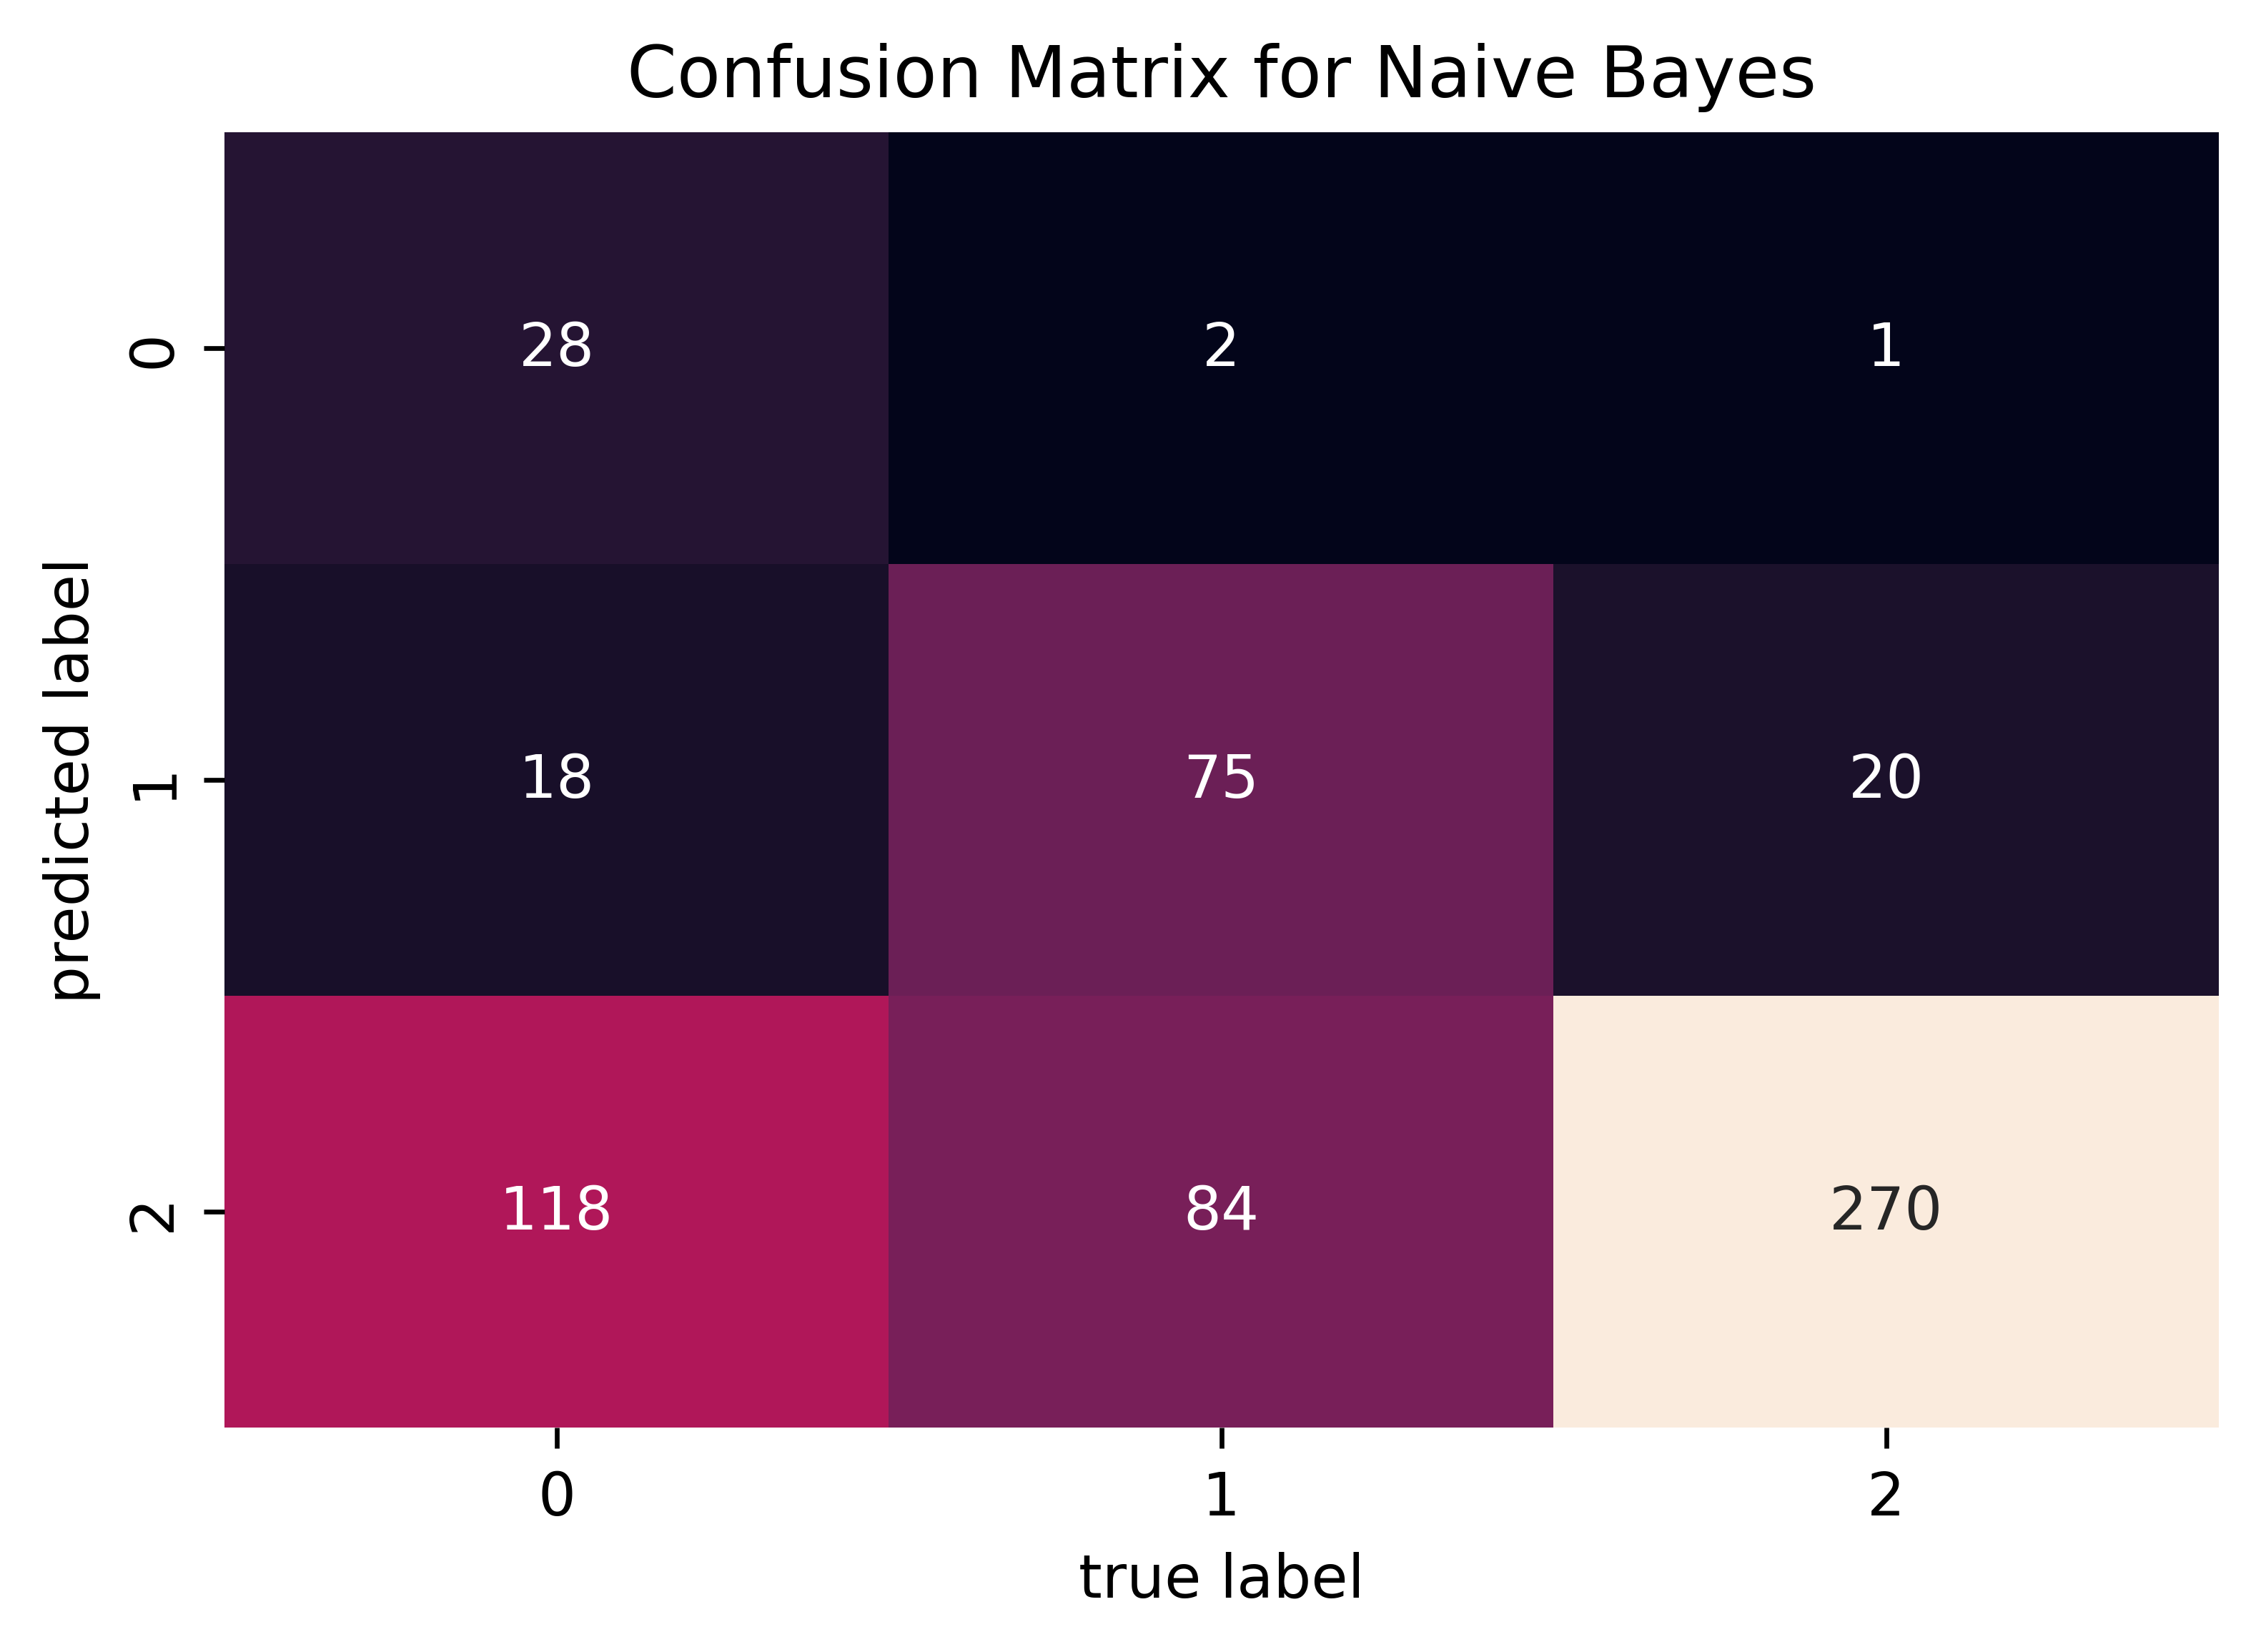

In [ ]:
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)


plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predictions, y_test)
print("Accuracy with Naive-Bayes: ", score_naive)


Accuracy with Naive-Bayes:  0.6055194805194806


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.17      0.29       164
           1       0.66      0.47      0.55       161
           2       0.57      0.93      0.71       291

    accuracy                           0.61       616
   macro avg       0.71      0.52      0.51       616
weighted avg       0.68      0.61      0.55       616

